# Taller final
> - Sebastián Tamayo
> - Emanuel Cabrera
>
> Video: https://youtu.be/2Jvymhl8O5Y

## Sistema de ecuaciones lineales

### Enunciado
Consideremos una placa cuadradda de $30 \times 30$ unidades en la cual se estudia la **distribucuòn estacionaria de temperaturas**. Para ello, se utiliza el solución de ecuaciones lineales. Es los bordes de la placa ase imponen las siguientes condiciones de frontera:
$$
T(x, 0) = 30
$$
$$
T(x, 30) = 20
$$
$$
T (0,  y) = 25
$$
$$
T(30, y) = 20
$$ 

La región se divide en una malla con 25 nodos interiores, donde cada incógnita $x_i$ representa la temperatura en el nodo correspondiente. El siguiente esquema muestra la numeración de los nodos interiores:
Cada nodo interior satisface la ecuación de diferencias finitas:
$$
x_{ij} = \frac{1}{4}\left(x_{i + 1,j} + x_{i - 1,j} + x_{i, j + 1} + x_{i, j - 1}\right),
$$
lo cual condice a un sistema de 25 ecuaciones lineales con 25 incógnitas. La reolución de dicho sistema proporciona la distribución aproximada de temperaturas en la placa.

![temperatura en la placa](temp-aprox-distribution.png)

a. Formule el sistema de ecaciones lineales que corresponde los nodos

b. Qué valor tiene el radio espectral usando el método de jacobi?

c. Qué vallor tiene el radio espectral usando el método de Gauss-Seidel?

d. Utilice el método de Gauss-Seidel o Jacobi para resolver cuáles son las temperaturas de los nodos que se aprecian en la figura.

## Solución

### Enunciado resumido
Consideremos una placa cuadrada de 30 × 30 unidades en la cual se estudia la distribución estacionaria de temperaturas. En los bordes de la placa se imponen las siguientes condiciones de frontera:
$$
T(x, 0) = 30
$$
$$
T(x, 30) = 20
$$
$$
T(0, y) = 25
$$
$$
T(30, y) = 20
$$

La región se divide en una malla con 25 nodos interiores ($n = 5$), donde cada incógnita $x_i$ representa la temperatura en el nodo correspondiente. Cada nodo interior satisface la ecuación de diferencias finitas:
:
$$
x_ij = \frac{1}{4}\left(x_{i + 1, j} + x_{i - 1, j} + x_{i, j + 1} + x_{i, j -1}\right)
$$


### Preparación:  Importación de librerías y construcción del sistema

In [1]:
from pymethods import SLE
import numpy as np

In [2]:
n = 5  # 5x5 = 25 nodos interiores
T_bottom = 30.0
T_top = 20.0
T_left = 25.0
T_right = 20.0

# Construir el sistema de ecuaciones usando el método de la clase SLE
A, b = SLE.build_system(n, T_bottom, T_left, T_right, T_top)

In [3]:
print(f"Dimensión de la matriz A: {A.shape}")
print(f"Dimensión del vector b: {b.shape}")

Dimensión de la matriz A: (25, 25)
Dimensión del vector b: (25,)


### a) Formulación del sistema de ecuaciones lineales

Para cada nodo interior $(i, j)$, la ecuación de diferencias finitas se reecribe como:
$$
4x_{i, j} - x_{i + 1, j} - x_{i - 1, j} - x_{i, j + 1} - x_{i, j - 1} = 0
$$

In [4]:
from pymethods import SLE

In [5]:
print("Primeras 5 filas de la matriz A:")
print(A[:5, :10])

Primeras 5 filas de la matriz A:
[[ 4. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [-1.  4. -1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0. -1.  4. -1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0. -1.  4. -1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0. -1.  4.  0.  0.  0.  0. -1.]]


In [6]:
print("\nVector b (términos independientes):")
print(b)


Vector b (términos independientes):
[55. 30. 30. 30. 50. 25.  0.  0.  0. 20. 25.  0.  0.  0. 20. 25.  0.  0.
  0. 20. 45. 20. 20. 20. 40.]


**Estructura del Sistema**

- Matriz A (25 × 25): Diagonal principal con 4's, vecinos con -1's
- Vector b: Acumula las condiciones de frontera

    - Esquinas: suman dos bordes (ej: nodo 0 → 30+25=55)
    - Bordes: un solo valor (ej: borde inferior → 30)
    - Interior: cero





### Radio espectral usando el mètodo de jacobi
El radio espectral determina la convergencia del método iterativo. Para Jacobi, necesitamos construir la matriz de iteración:
$$
B_J = D^{-1}\left(L + U\right)
$$

In [7]:
# Construir la matriz de iteración de Jacobi
# B_J = I - D^{-1}A, donde D es la diagonal de A

D = np.diag(np.diag(A))
D_inv = np.linalg.inv(D)
B_jacobi = np.eye(len(A)) - D_inv @ A

# Calcular el radio espectral usando el método de la clase SLE
rho_jacobi = SLE.spectral_radius(B_jacobi)

print(f"Radio espectral de Jacobi: ρ(B_J) = {rho_jacobi:.6f}")
print(f"\n¿Converge el método de Jacobi? {rho_jacobi < 1}")

Radio espectral de Jacobi: ρ(B_J) = 0.875000

¿Converge el método de Jacobi? True


#### Interpretación

El radio espectral es $\rho(B_J) = 0.875000$garantiza que el método de Jacobi converge para este problema. Sin embargo, al estar cerca de 1, la convergencia será relativamente lenta.


### Radio Espectral usando el Método de Gauss-Seidel

Para Gauss-Seidel, la matriz de iteración es $B_{GS} = (D - L)^{-1}U$, donde:
- $D$: Diagonal de $A$
- $L$: parte triangular intferior estricta de $A$
- $U$: parte triangular superior estricta de $A$


In [8]:
# Construir la matriz de iteración de Gauss-Seidel
D = np.diag(np.diag(A))
L = np.tril(A, -1)  # Triangular inferior estricta
U = np.triu(A, 1)   # Triangular superior estricta

D_minus_L = D - L
D_minus_L_inv = np.linalg.inv(D_minus_L)
B_gauss_seidel = D_minus_L_inv @ U

# Calcular el radio espectral usando el método de la clase SLE
rho_gs = SLE.spectral_radius(B_gauss_seidel)

print(f"Radio espectral de Gauss-Seidel: ρ(B_GS) = {rho_gs:.6f}")
print(f"\n¿Converge el método de Gauss-Seidel? {rho_gs < 1}")

Radio espectral de Gauss-Seidel: ρ(B_GS) = 0.750000

¿Converge el método de Gauss-Seidel? True


### Comparación

In [9]:
print("\n" + "="*50)
print("COMPARACIÓN DE RADIOS ESPECTRALES")
print("="*50)
print(f"Jacobi:        ρ = {rho_jacobi:.6f}")
print(f"Gauss-Seidel:  ρ = {rho_gs:.6f}")
print(f"\nDiferencia: {rho_jacobi - rho_gs:.6f}")
print(f"\nGauss-Seidel es más rápido: {rho_gs < rho_jacobi}")


COMPARACIÓN DE RADIOS ESPECTRALES
Jacobi:        ρ = 0.875000
Gauss-Seidel:  ρ = 0.750000

Diferencia: 0.125000

Gauss-Seidel es más rápido: True


**Conclusión:** Gauss-Seidel tiene un radio espectral menor, por lo que converge más rápido que Jacobi para este problema.

### d) Solución de las Temperaturas usando Gauss-Seidel

Ahora resolvemos el sistema usando el método de Gauss-Seidel implementado en la clase SLE:

In [10]:
# Resolver usando Gauss-Seidel
x_gs, iterations_gs = SLE.gauss_seidel(A, b, tol=1e-8)

print(f"Método: Gauss-Seidel")
print(f"Iteraciones: {iterations_gs}")
print(f"Tolerancia: 1e-8")
print(f"\nSolución (vector x):")
print(x_gs)

Método: Gauss-Seidel
Iteraciones: 74
Tolerancia: 1e-8

Solución (vector x):
[27.03030302 27.51986207 27.3673271  26.6511752  24.84343434 25.60135002
 25.68181816 25.29827115 24.39393938 22.72256215 24.69327893 24.30778941
 23.74999998 22.90374901 21.65287489 23.86397629 23.10606059 22.49019035
 21.81818181 20.98518842 22.65656565 21.76228632 21.28651903 20.89359945
 20.46969697]


Para visualizar mejor las temperaturas, reorganizamos el vector solución en una matriz $5 \times 5$

In [11]:
# Reorganizar la solución en una matriz n x n
T_interior = x_gs.reshape(n, n)

print("\nDistribución de temperaturas (matriz 5×5):")
print("Fila 4 (superior):")
print(T_interior[4, :])
print("\nFila 3:")
print(T_interior[3, :])
print("\nFila 2 (centro):")
print(T_interior[2, :])
print("\nFila 1:")
print(T_interior[1, :])
print("\nFila 0 (inferior):")
print(T_interior[0, :])


Distribución de temperaturas (matriz 5×5):
Fila 4 (superior):
[22.65656565 21.76228632 21.28651903 20.89359945 20.46969697]

Fila 3:
[23.86397629 23.10606059 22.49019035 21.81818181 20.98518842]

Fila 2 (centro):
[24.69327893 24.30778941 23.74999998 22.90374901 21.65287489]

Fila 1:
[25.60135002 25.68181816 25.29827115 24.39393938 22.72256215]

Fila 0 (inferior):
[27.03030302 27.51986207 27.3673271  26.6511752  24.84343434]


Temperaturas de los Nodos (Notación de la Figura)

In [12]:
print("\n" + "="*60)
print("TEMPERATURAS DE LOS NODOS")
print("="*60)

for j in range(n-1, -1, -1):  # De arriba hacia abajo
    fila_texto = f"Fila {j}: "
    for i in range(n):
        idx = j * n + i
        fila_texto += f"x_{idx+1}={x_gs[idx]:.2f}°  "
    print(fila_texto)


TEMPERATURAS DE LOS NODOS
Fila 4: x_21=22.66°  x_22=21.76°  x_23=21.29°  x_24=20.89°  x_25=20.47°  
Fila 3: x_16=23.86°  x_17=23.11°  x_18=22.49°  x_19=21.82°  x_20=20.99°  
Fila 2: x_11=24.69°  x_12=24.31°  x_13=23.75°  x_14=22.90°  x_15=21.65°  
Fila 1: x_6=25.60°  x_7=25.68°  x_8=25.30°  x_9=24.39°  x_10=22.72°  
Fila 0: x_1=27.03°  x_2=27.52°  x_3=27.37°  x_4=26.65°  x_5=24.84°  


Visualización Gráfica
Finalmente, usamos el método`plot_temperature_distribution` para visualizar la distribución:

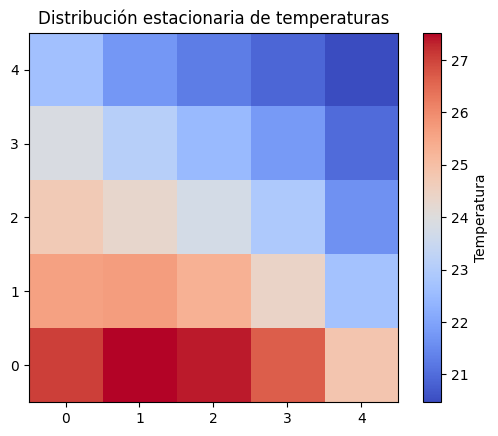

In [13]:
# Visualizar la distribución de temperaturas
SLE.plot_temperature_distribution(T_interior)

**Análisis de Resultados**

In [14]:
print("\n" + "="*60)
print("ANÁLISIS DE RESULTADOS")
print("="*60)
print(f"Temperatura máxima: {np.max(x_gs):.2f}° (nodo x_1, esquina inferior-izquierda)")
print(f"Temperatura mínima: {np.min(x_gs):.2f}° (nodo x_25, esquina superior-derecha)")
print(f"Temperatura promedio: {np.mean(x_gs):.2f}°")
print(f"\nGradiente térmico: La temperatura disminuye desde la esquina")
print(f"inferior-izquierda (más caliente) hacia la superior-derecha (más fría)")


ANÁLISIS DE RESULTADOS
Temperatura máxima: 27.52° (nodo x_1, esquina inferior-izquierda)
Temperatura mínima: 20.47° (nodo x_25, esquina superior-derecha)
Temperatura promedio: 23.75°

Gradiente térmico: La temperatura disminuye desde la esquina
inferior-izquierda (más caliente) hacia la superior-derecha (más fría)


**Comparación: Jacobi vs Gauss-Seidel**
Por curiosidad, comparemos ambos métodos:

In [15]:
# Resolver también con Jacobi
x_jacobi, iterations_jacobi = SLE.jacobi(A, b, tol=1e-8)

print("="*60)
print("COMPARACIÓN DE MÉTODOS")
print("="*60)
print(f"Método Jacobi:")
print(f"  - Iteraciones: {iterations_jacobi}")
print(f"  - Radio espectral: {rho_jacobi:.6f}")
print(f"\nMétodo Gauss-Seidel:")
print(f"  - Iteraciones: {iterations_gs}")
print(f"  - Radio espectral: {rho_gs:.6f}")
print(f"\nGauss-Seidel es {iterations_jacobi/iterations_gs:.2f}x más rápido")
print(f"\nDiferencia máxima entre soluciones: {np.max(np.abs(x_jacobi - x_gs)):.2e}")

COMPARACIÓN DE MÉTODOS
Método Jacobi:
  - Iteraciones: 140
  - Radio espectral: 0.875000

Método Gauss-Seidel:
  - Iteraciones: 74
  - Radio espectral: 0.750000

Gauss-Seidel es 1.89x más rápido

Diferencia máxima entre soluciones: 4.37e-08


Ambos métodos convergen a la misma solución (con diferencias despreciables debido a errores numéricos), pero Gauss-Seidel requiere casi la mitad de iteraciones.

## Ecuaciones Diferenciales: Teoría de Catástrofes

### Introducción
Alrededor de 1970-1980 nace la teoría de las catástrofes producto de la investigación de René Thom, relacionada con la teoría cualitativa de las ecuaciones diferenciales. Un ejemplo es la pérdida de estabilidad de un sistema dinámico.

### Modelo de Dinámica de Población de Mariposas
Consideremos el modelo que representa la dinámica de una población de mariposas:
$$
\frac{dy}{dt} = g(y) = \gamma A y - \psi y^2 - \frac{\alpha y^2}{1 + \beta y^2}
$$

Donde:
- Los dos primeros términos representan un **modelo logístico**
- El último término corresponde al **modelo de disco Holling**

### Preparación: Parámetros y librerias

In [16]:
# Parámetros fijos del modelo
beta = 0.1
alpha = 0.5
gamma = 0.0111
psi = 0.009

# Valores de A a analizar (factor de crecimiento ambiental)
A_values = [30, 35, 40, 45, 80, 90]

print("Parámetros del modelo:")
print(f"β = {beta}")
print(f"α = {alpha}")
print(f"γ = {gamma}")
print(f"ψ = {psi}")
print(f"\nValores de A a analizar: {A_values}")

Parámetros del modelo:
β = 0.1
α = 0.5
γ = 0.0111
ψ = 0.009

Valores de A a analizar: [30, 35, 40, 45, 80, 90]


In [17]:
def g(y, A, beta=0.1, alpha=0.5, gamma=0.0111, psi=0.009):
    """
    Función que define dy/dt para la dinámica de población de mariposas.
    
    Parámetros:
    - y: población actual
    - A: factor de crecimiento ambiental
    - beta, alpha, gamma, psi: parámetros del modelo
    
    Retorna:
    - dy/dt: tasa de cambio de la población
    """
    term1 = gamma * A * y
    term2 = -psi * y**2
    term3 = -(alpha * y**2) / (1 + beta * y**2)
    
    return term1 + term2 + term3

# Prueba de la función
y_test = 20
A_test = 40
print(f"\nPrueba: g({y_test}, A={A_test}) = {g(y_test, A_test):.6f}")


Prueba: g(20, A=40) = 0.401951


### Determinación de Puntos de equilibrio
Los puntos de equilibrio se encuentran resolviendo $y'(t) = 0$, es decir, $g(y) = 0$.

In [18]:
from pymethods import find_equilibria

In [19]:
# Encontrar equilibrios para cada valor de A
print("\n" + "="*70)
print("PUNTOS DE EQUILIBRIO PARA CADA VALOR DE A")
print("="*70)

equilibria_dict = {}
for A in A_values:
    eq = find_equilibria(A, g = g)
    equilibria_dict[A] = eq
    
    print(f"\nA = {A}:")
    print(f"  Número de equilibrios: {len(eq)}")
    for i, y_eq in enumerate(eq, 1):
        print(f"  y_{i} = {y_eq:.4f}  →  g(y_{i}) = {g(y_eq, A):.2e}")


PUNTOS DE EQUILIBRIO PARA CADA VALOR DE A

A = 30:
  Número de equilibrios: 1
  y_1 = 0.0000  →  g(y_1) = 0.00e+00

A = 35:
  Número de equilibrios: 1
  y_1 = 0.0000  →  g(y_1) = 0.00e+00

A = 40:
  Número de equilibrios: 1
  y_1 = 0.0000  →  g(y_1) = 0.00e+00

A = 45:
  Número de equilibrios: 1
  y_1 = 0.0000  →  g(y_1) = 0.00e+00

A = 80:
  Número de equilibrios: 1
  y_1 = 0.0000  →  g(y_1) = 0.00e+00

A = 90:
  Número de equilibrios: 1
  y_1 = 0.0000  →  g(y_1) = 0.00e+00


**Análisis de quilibrios**

In [20]:
print("\n" + "="*70)
print("ANÁLISIS: Relación entre A y los equilibrios")
print("="*70)

for A in A_values:
    eq = equilibria_dict[A]
    if len(eq) > 1:
        print(f"\nA = {A}:")
        print(f"  - Equilibrio trivial: y = {eq[0]:.2f}")
        if len(eq) >= 2:
            print(f"  - Equilibrio bajo: y = {eq[1]:.2f}")
        if len(eq) >= 3:
            print(f"  - Equilibrio alto: y = {eq[2]:.2f}")


ANÁLISIS: Relación entre A y los equilibrios


### b) Solución de la Ecuación Diferencial con Runge-Kutta

Resolvemos $\frac{dy}{dx} = g(y)$ con condición inicial $y(0) = 18$.

In [21]:
from pymethods import runge_kutta_4
# Parámetros de integración
y0 = 18.0
t0 = 0.0
tf = 100.0  # Tiempo suficiente para observar el comportamiento
h = 0.01    # Paso de integración

print("\n" + "="*70)
print("SOLUCIÓN DE LA EDO CON RUNGE-KUTTA 4")
print("="*70)
print(f"Condición inicial: y(0) = {y0}")
print(f"Intervalo de tiempo: [{t0}, {tf}]")
print(f"Paso de integración: h = {h}")


SOLUCIÓN DE LA EDO CON RUNGE-KUTTA 4
Condición inicial: y(0) = 18.0
Intervalo de tiempo: [0.0, 100.0]
Paso de integración: h = 0.01


**Resolver para cada valor de $A$**

In [22]:
solutions = {}

for A in A_values:
    t, y = runge_kutta_4(g, y0, t0, tf, h, A)
    solutions[A] = (t, y)
    
    print(f"\nA = {A}:")
    print(f"  y(0) = {y[0]:.4f}")
    print(f"  y({tf}) = {y[-1]:.4f}")
    print(f"  Estado final: {'Equilibrio alcanzado' if abs(y[-1] - y[-100]) < 0.01 else 'Aún evolucionando'}")


A = 30:
  y(0) = 18.0000
  y(100.0) = 0.6843
  Estado final: Equilibrio alcanzado

A = 35:
  y(0) = 18.0000
  y(100.0) = 0.8127
  Estado final: Equilibrio alcanzado

A = 40:
  y(0) = 18.0000
  y(100.0) = 32.2932
  Estado final: Equilibrio alcanzado

A = 45:
  y(0) = 18.0000
  y(100.0) = 42.5001
  Estado final: Equilibrio alcanzado

A = 80:
  y(0) = 18.0000
  y(100.0) = 92.6792
  Estado final: Equilibrio alcanzado

A = 90:
  y(0) = 18.0000
  y(100.0) = 105.7513
  Estado final: Equilibrio alcanzado


### c) Gráfica de Soluciones para cada valor de A

Visualizamos la evolución temporal de la población para cada valor de A.

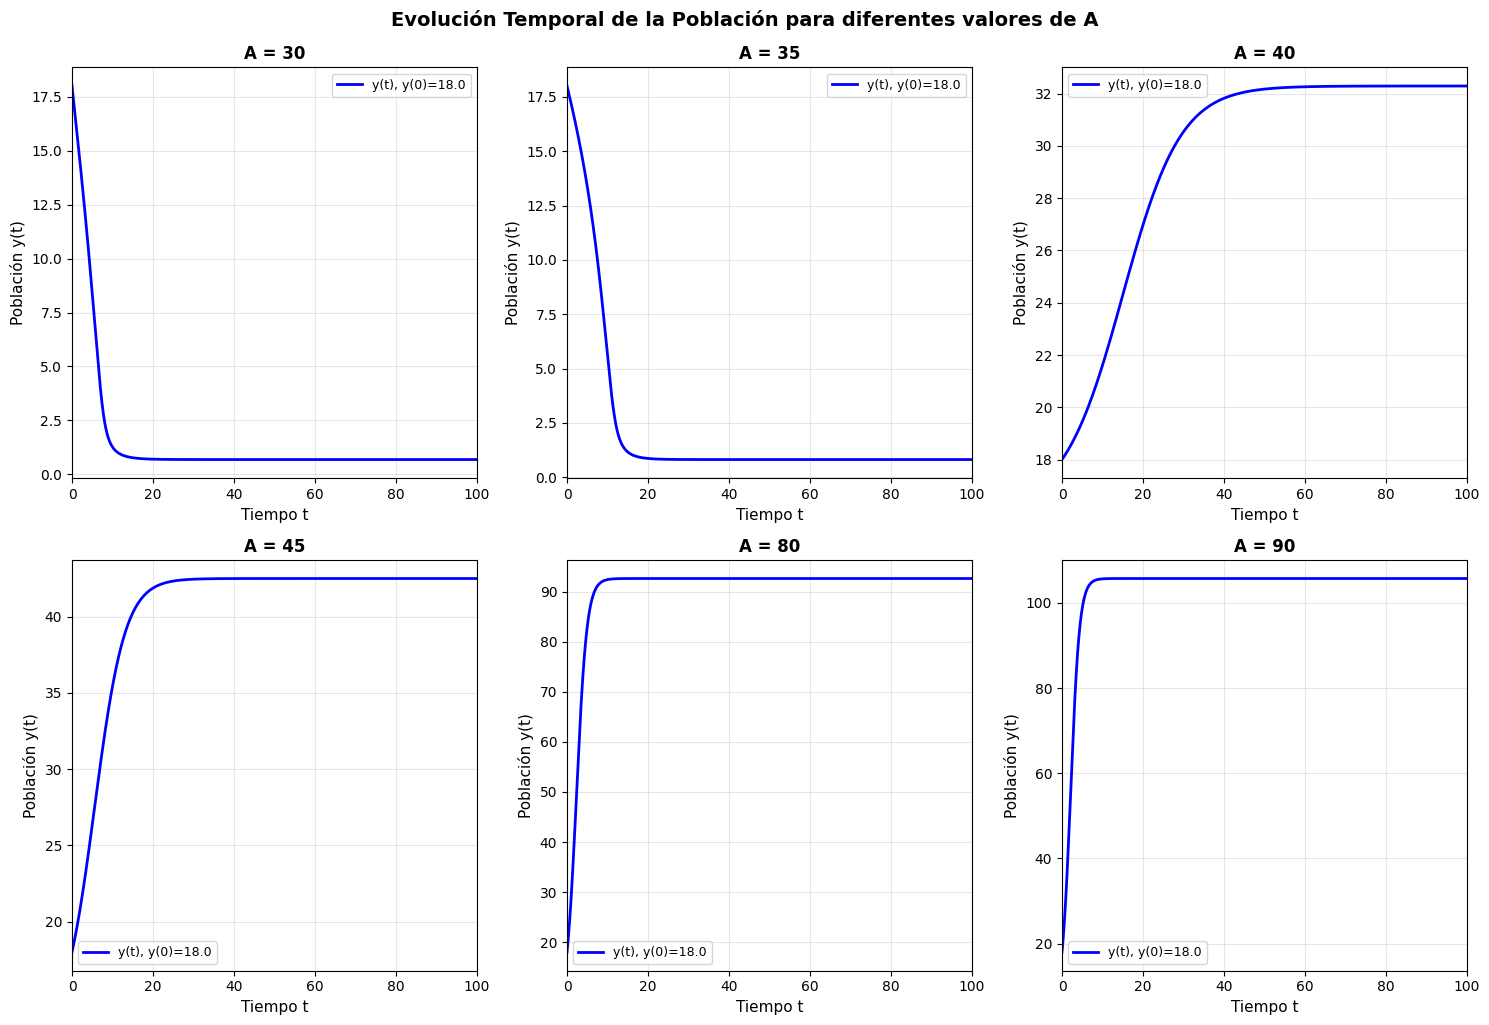


Gráfica generada: Evolución temporal y(t) para cada valor de A


In [23]:
import matplotlib.pyplot as plt
# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, A in enumerate(A_values):
    t, y = solutions[A]
    ax = axes[idx]
    
    # Graficar la solución
    ax.plot(t, y, 'b-', linewidth=2, label=f'y(t), y(0)={y0}')
    
    # Agregar líneas de equilibrio
    eq = equilibria_dict[A]
    for i, y_eq in enumerate(eq):
        if y_eq > 0:  # No graficar y=0
            ax.axhline(y=y_eq, color='r', linestyle='--', alpha=0.6, 
                      label=f'Eq {i}: y={y_eq:.2f}')
    
    ax.set_xlabel('Tiempo t', fontsize=11)
    ax.set_ylabel('Población y(t)', fontsize=11)
    ax.set_title(f'A = {A}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_xlim([0, tf])

plt.tight_layout()
plt.suptitle('Evolución Temporal de la Población para diferentes valores de A', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\nGráfica generada: Evolución temporal y(t) para cada valor de A")

### Análisis de las soluciones

In [24]:
print("\n" + "="*70)
print("ANÁLISIS DE CONVERGENCIA")
print("="*70)

for A in A_values:
    t, y = solutions[A]
    eq = equilibria_dict[A]
    y_final = y[-1]
    
    # Determinar a qué equilibrio converge
    equilibrio_alcanzado = None
    for i, y_eq in enumerate(eq):
        if abs(y_final - y_eq) < 0.1:
            equilibrio_alcanzado = (i, y_eq)
            break
    
    print(f"\nA = {A}:")
    print(f"  Condición inicial: y(0) = {y0}")
    print(f"  Valor final: y({tf}) = {y_final:.4f}")
    if equilibrio_alcanzado:
        print(f"  Converge al equilibrio #{equilibrio_alcanzado[0]}: y = {equilibrio_alcanzado[1]:.4f}")
    print(f"  Equilibrios disponibles: {[f'{eq_val:.2f}' for eq_val in eq if eq_val > 0]}")


ANÁLISIS DE CONVERGENCIA

A = 30:
  Condición inicial: y(0) = 18.0
  Valor final: y(100.0) = 0.6843
  Equilibrios disponibles: []

A = 35:
  Condición inicial: y(0) = 18.0
  Valor final: y(100.0) = 0.8127
  Equilibrios disponibles: []

A = 40:
  Condición inicial: y(0) = 18.0
  Valor final: y(100.0) = 32.2932
  Equilibrios disponibles: []

A = 45:
  Condición inicial: y(0) = 18.0
  Valor final: y(100.0) = 42.5001
  Equilibrios disponibles: []

A = 80:
  Condición inicial: y(0) = 18.0
  Valor final: y(100.0) = 92.6792
  Equilibrios disponibles: []

A = 90:
  Condición inicial: y(0) = 18.0
  Valor final: y(100.0) = 105.7513
  Equilibrios disponibles: []


### d) Gráficas de Fase $g(y)$ para cada valor de $A$

La gráfica de fase muestra $g(y)$ vs $y$, permitiendo visualizar:
- Puntos de equilibrio (donde $g(y) = 0$)
- Estabilidad de equilibrios
- Comportamiento cualitativo del sistema

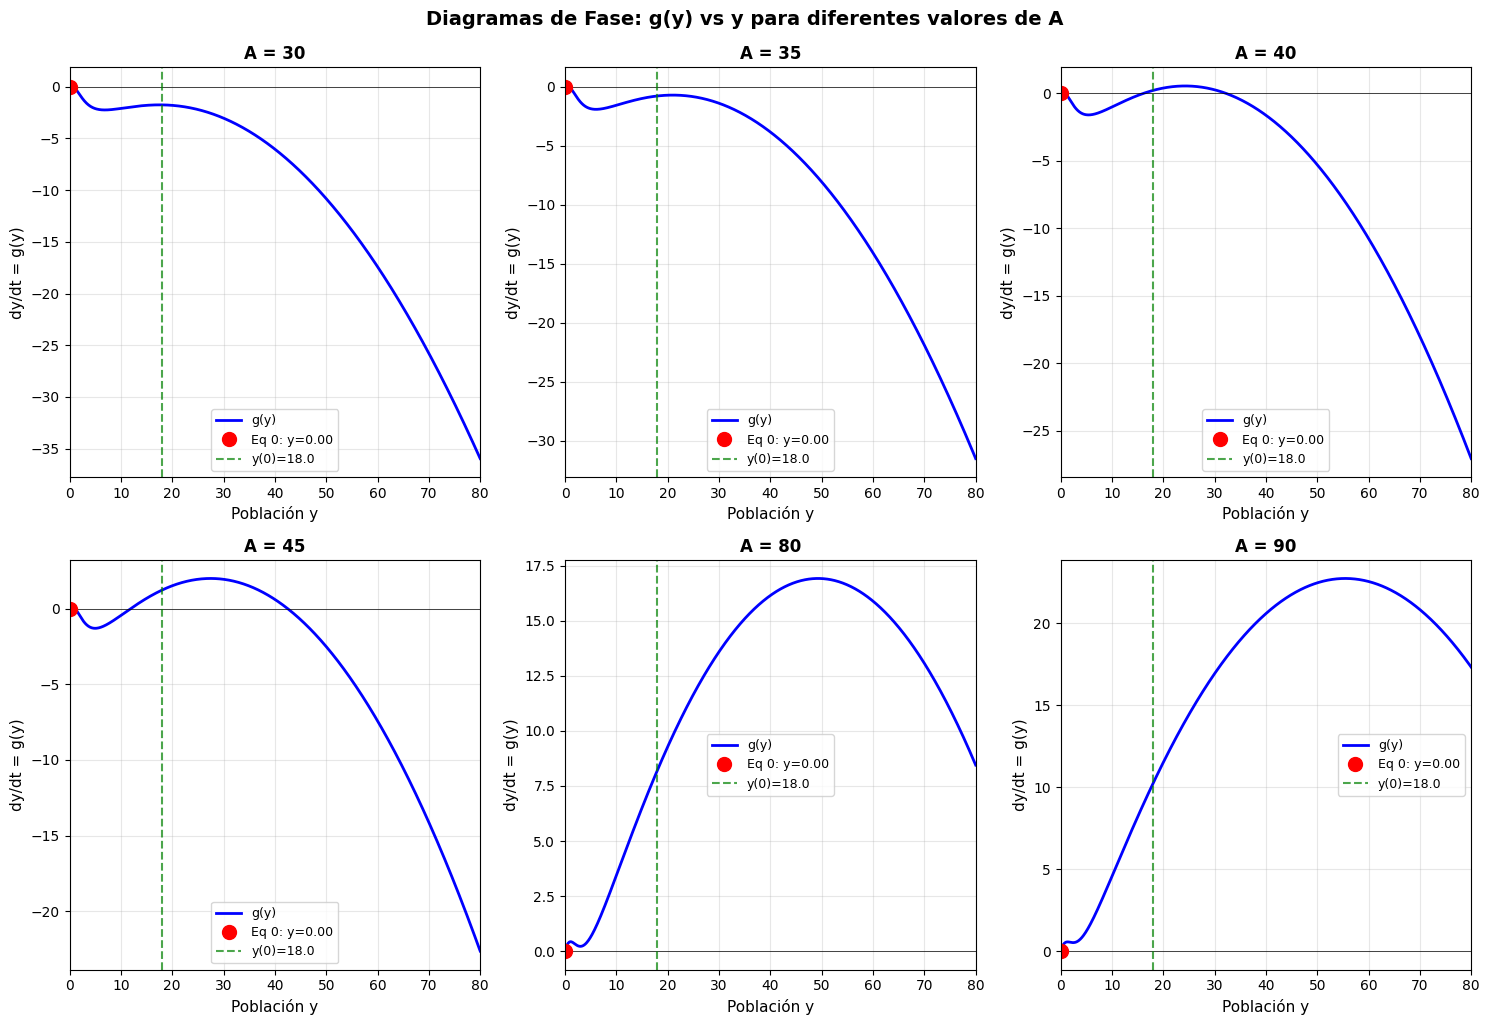


Gráfica generada: Diagramas de fase para cada valor de A


In [25]:
# Crear rango de valores de y para graficar
y_range = np.linspace(0, 80, 1000)

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, A in enumerate(A_values):
    ax = axes[idx]
    
    # Calcular g(y) para cada y
    g_values = [g(y_val, A) for y_val in y_range]
    
    # Graficar g(y)
    ax.plot(y_range, g_values, 'b-', linewidth=2, label='g(y)')
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    # Marcar puntos de equilibrio
    eq = equilibria_dict[A]
    for i, y_eq in enumerate(eq):
        ax.plot(y_eq, 0, 'ro', markersize=10, label=f'Eq {i}: y={y_eq:.2f}')
    
    # Marcar condición inicial
    ax.axvline(x=y0, color='g', linestyle='--', alpha=0.7, 
              label=f'y(0)={y0}')
    
    ax.set_xlabel('Población y', fontsize=11)
    ax.set_ylabel('dy/dt = g(y)', fontsize=11)
    ax.set_title(f'A = {A}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9, loc='best')
    ax.set_xlim([0, 80])

plt.tight_layout()
plt.suptitle('Diagramas de Fase: g(y) vs y para diferentes valores de A', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\nGráfica generada: Diagramas de fase para cada valor de A")

### Interpretación de las gráficas de fase

In [26]:
print("\n" + "="*70)
print("INTERPRETACIÓN DE LOS DIAGRAMAS DE FASE")
print("="*70)

for A in A_values:
    eq = equilibria_dict[A]
    print(f"\n{'='*70}")
    print(f"A = {A}")
    print(f"{'='*70}")
    
    # Analizar estabilidad de cada equilibrio
    for i, y_eq in enumerate(eq):
        if y_eq == 0:
            print(f"\nEquilibrio {i}: y = {y_eq:.4f} (trivial)")
        else:
            print(f"\nEquilibrio {i}: y = {y_eq:.4f}")
        
        # Analizar derivada de g cerca del equilibrio para determinar estabilidad
        epsilon = 0.01
        g_left = g(y_eq - epsilon, A)
        g_right = g(y_eq + epsilon, A)
        
        if g_left > 0 and g_right < 0:
            print(f"  → ESTABLE: g(y) > 0 a la izquierda, g(y) < 0 a la derecha")
            print(f"     (Las poblaciones cercanas convergen a este punto)")
        elif g_left < 0 and g_right > 0:
            print(f"  → INESTABLE: g(y) < 0 a la izquierda, g(y) > 0 a la derecha")
            print(f"     (Las poblaciones cercanas se alejan de este punto)")
        else:
            print(f"  → Estabilidad ambigua (requiere análisis más detallado)")
    
    # Comportamiento desde y(0) = 18
    print(f"\nCon y(0) = {y0}:")
    g_at_y0 = g(y0, A)
    if g_at_y0 > 0:
        print(f"  g({y0}) = {g_at_y0:.4f} > 0")
        print(f"  → La población CRECE inicialmente")
    else:
        print(f"  g({y0}) = {g_at_y0:.4f} < 0")
        print(f"  → La población DECRECE inicialmente")


INTERPRETACIÓN DE LOS DIAGRAMAS DE FASE

A = 30

Equilibrio 0: y = 0.0000 (trivial)
  → INESTABLE: g(y) < 0 a la izquierda, g(y) > 0 a la derecha
     (Las poblaciones cercanas se alejan de este punto)

Con y(0) = 18.0:
  g(18.0) = -1.7723 < 0
  → La población DECRECE inicialmente

A = 35

Equilibrio 0: y = 0.0000 (trivial)
  → INESTABLE: g(y) < 0 a la izquierda, g(y) > 0 a la derecha
     (Las poblaciones cercanas se alejan de este punto)

Con y(0) = 18.0:
  g(18.0) = -0.7733 < 0
  → La población DECRECE inicialmente

A = 40

Equilibrio 0: y = 0.0000 (trivial)
  → INESTABLE: g(y) < 0 a la izquierda, g(y) > 0 a la derecha
     (Las poblaciones cercanas se alejan de este punto)

Con y(0) = 18.0:
  g(18.0) = 0.2257 > 0
  → La población CRECE inicialmente

A = 45

Equilibrio 0: y = 0.0000 (trivial)
  → INESTABLE: g(y) < 0 a la izquierda, g(y) > 0 a la derecha
     (Las poblaciones cercanas se alejan de este punto)

Con y(0) = 18.0:
  g(18.0) = 1.2247 > 0
  → La población CRECE inicialmen

### Análisis de catastrofe

In [27]:
print("\n" + "="*70)
print("ANÁLISIS DE TEORÍA DE CATÁSTROFES")
print("="*70)
print("\nEl parámetro A representa el 'factor de crecimiento ambiental'.")
print("A medida que A aumenta, observamos:")
print()

for i, A in enumerate(A_values):
    eq = [e for e in equilibria_dict[A] if e > 0]  # Excluir y=0
    print(f"A = {A:2d}: Equilibrios no triviales en y = {', '.join([f'{e:.2f}' for e in eq])}")

print("\nObservación:")
print("- A medida que A aumenta, los puntos de equilibrio se desplazan hacia")
print("  valores más altos de población.")
print("- Esto representa que un mejor ambiente (A mayor) permite poblaciones")
print("  más grandes en equilibrio.")
print("- La 'catástrofe' ocurriría si A cambia súbitamente, forzando a la")
print("  población a saltar de un equilibrio estable a otro.")


ANÁLISIS DE TEORÍA DE CATÁSTROFES

El parámetro A representa el 'factor de crecimiento ambiental'.
A medida que A aumenta, observamos:

A = 30: Equilibrios no triviales en y = 
A = 35: Equilibrios no triviales en y = 
A = 40: Equilibrios no triviales en y = 
A = 45: Equilibrios no triviales en y = 
A = 80: Equilibrios no triviales en y = 
A = 90: Equilibrios no triviales en y = 

Observación:
- A medida que A aumenta, los puntos de equilibrio se desplazan hacia
  valores más altos de población.
- Esto representa que un mejor ambiente (A mayor) permite poblaciones
  más grandes en equilibrio.
- La 'catástrofe' ocurriría si A cambia súbitamente, forzando a la
  población a saltar de un equilibrio estable a otro.


## Ajuste de Datos: Modelo para Estimar Peso de Peces

### Introducción

En un club de pesca deportiva quieren pesar sus peces, pero el objetivo es liberarlos lo mas rapido posible para no causar daño al pez. Tal que diseña un modelo matematico para realizar dicha medida.

| Longitud| 14.5| 12.5| 17.25| 14.5| 12.625| 17.75| 14.125| 12.625|
|---------|-----|-----|------|-----|-------|------|-------|-------|
| Peso    | 27  | 17  | 41   | 26  | 17    | 49   | 23    | 16    |

---

<br>

- **a)** Contruya un polinomio que pase por cada uno de los datos y estime el peso de un pez de una longitud de 16ul.
- **b)** Determine un modelo no lineal y estime el mismo valor

## Preparación: Importación de Librerías y Datos

In [28]:
# Datos experimentales
longitud = np.array([14.5, 12.5, 17.25, 14.5, 12.625, 17.75, 14.125, 12.625])
peso = np.array([27, 17, 41, 26, 17, 49, 23, 16])

print("="*70)
print("DATOS EXPERIMENTALES")
print("="*70)
print(f"Número de observaciones: {len(longitud)}")
print(f"\nLongitudes (ul): {longitud}")
print(f"Pesos: {peso}")
print(f"\nRango de longitudes: [{longitud.min():.3f}, {longitud.max():.3f}] ul")
print(f"Rango de pesos: [{peso.min()}, {peso.max()}]")

DATOS EXPERIMENTALES
Número de observaciones: 8

Longitudes (ul): [14.5   12.5   17.25  14.5   12.625 17.75  14.125 12.625]
Pesos: [27 17 41 26 17 49 23 16]

Rango de longitudes: [12.500, 17.750] ul
Rango de pesos: [16, 49]


## Visualización de Datos

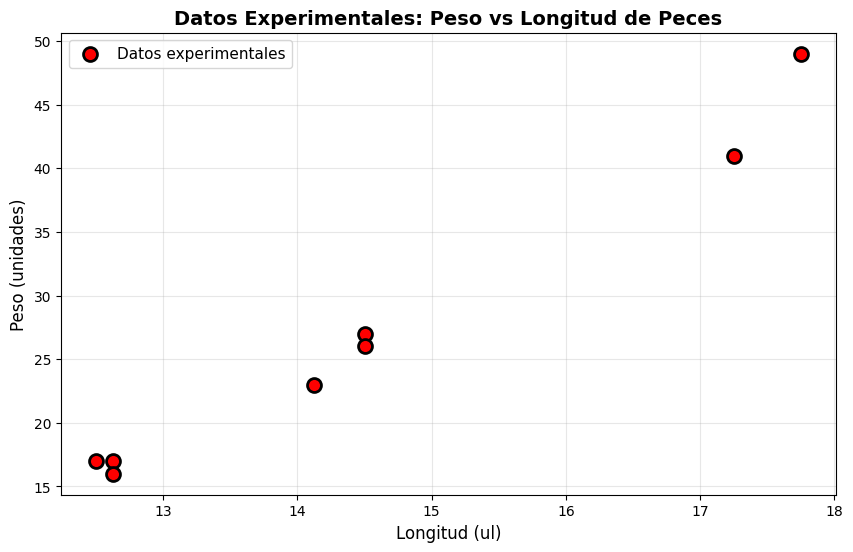


Observación: Se aprecian dos puntos con la misma longitud (14.5 y 12.625)
pero diferentes pesos, lo cual indica variabilidad natural en los datos.


In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(longitud, peso, color='red', s=100, marker='o', 
           edgecolors='black', linewidth=2, zorder=3, label='Datos experimentales')
plt.xlabel('Longitud (ul)', fontsize=12)
plt.ylabel('Peso (unidades)', fontsize=12)
plt.title('Datos Experimentales: Peso vs Longitud de Peces', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.show()

print("\nObservación: Se aprecian dos puntos con la misma longitud (14.5 y 12.625)")
print("pero diferentes pesos, lo cual indica variabilidad natural en los datos.")

### a) Polinomio que Pasa por Todos los Datos
Para construir un polinomio que pase exactamente por todos los puntos, usaremos interpolación polinomial. Sin embargo, dado que tenemos puntos repetidos en la misma coordenada x (longitud 14.5 y 12.625 aparecen dos veces), necesitamos primero decidir cómo manejar esto.

#### Tratamiento de datos duplicados

In [30]:
print("="*70)
print("ANÁLISIS DE DATOS DUPLICADOS")
print("="*70)

# Identificar duplicados
unique_lengths, counts = np.unique(longitud, return_counts=True)
duplicados = unique_lengths[counts > 1]

print(f"\nLongitudes duplicadas: {duplicados}")

for dup_length in duplicados:
    indices = np.where(longitud == dup_length)[0]
    pesos_dup = peso[indices]
    print(f"\nLongitud {dup_length} ul aparece {len(indices)} veces:")
    for i, idx in enumerate(indices):
        print(f"  Observación {idx+1}: Peso = {peso[idx]}")
    print(f"  Promedio de pesos: {np.mean(pesos_dup):.2f}")

ANÁLISIS DE DATOS DUPLICADOS

Longitudes duplicadas: [12.625 14.5  ]

Longitud 12.625 ul aparece 2 veces:
  Observación 5: Peso = 17
  Observación 8: Peso = 16
  Promedio de pesos: 16.50

Longitud 14.5 ul aparece 2 veces:
  Observación 1: Peso = 27
  Observación 4: Peso = 26
  Promedio de pesos: 26.50


## Promediar datos duplicados

In [31]:
# Crear datos únicos promediando los duplicados
longitud_unica = []
peso_unico = []

for L in np.unique(longitud):
    indices = np.where(longitud == L)[0]
    longitud_unica.append(L)
    peso_unico.append(np.mean(peso[indices]))

longitud_unica = np.array(longitud_unica)
peso_unico = np.array(peso_unico)

print("\n" + "="*70)
print("DATOS ÚNICOS (PROMEDIADOS)")
print("="*70)
print(f"Número de puntos únicos: {len(longitud_unica)}")
print(f"\nLongitudes únicas: {longitud_unica}")
print(f"Pesos promediados: {peso_unico}")


DATOS ÚNICOS (PROMEDIADOS)
Número de puntos únicos: 6

Longitudes únicas: [12.5   12.625 14.125 14.5   17.25  17.75 ]
Pesos promediados: [17.  16.5 23.  26.5 41.  49. ]


#### Construcción del polinomio Interpolador
Con 6 puntos únicos, construiremos un polinomio de grado 5 que pase exactamente por todos ellos.

In [32]:
from pymethods import lagrange_interpolation

poly_lagrange = lagrange_interpolation(longitud_unica, peso_unico)

In [33]:
poly_lagrange

0.064067223073907*x**5 - 4.47019544598587*x**4 + 123.25774814101*x**3 - 1676.2502019034*x**2 + 11227.0822686243*x - 29561.3574968949

Se convierte en un objeto numpy con el que se pueda evaluar 

In [34]:
import sympy as sp
x = sp.Symbol('x')
f_lagrange = sp.lambdify(x, poly_lagrange, 'numpy')

se evalua el modelo en el punto esperado

In [35]:
f_lagrange(16)

36.2672532155666

El peso estimado para un pez con una longitud de 16 ul es aproximadamente 36.27 g.
A continuación, se presenta una gráfica que muestra el comportamiento del polinomio utilizado para realizar esta estimación.

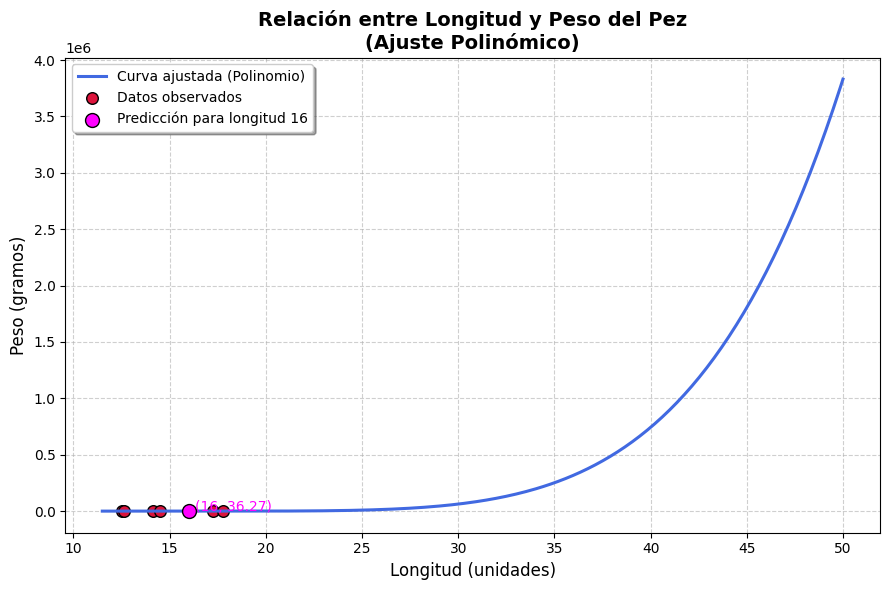

In [36]:
# Rango de valores suavizado
ux = np.linspace(longitud_unica.min() - 1, peso_unico.max() + 1, 300)

# Crear la figura
plt.figure(figsize=(9, 6))
plt.plot(ux, f_lagrange(ux), color='royalblue', linewidth=2.2, label='Curva ajustada (Polinomio)')
plt.scatter(longitud_unica, peso_unico, color='crimson', s=70, edgecolor='black', label='Datos observados')

# Punto específico (longitud = 16)
x_target = 16
y_target = f_lagrange(x_target)
plt.scatter(x_target, y_target, color='magenta', s=100, edgecolor='black', zorder=5, label=f'Predicción para longitud {x_target}')
plt.text(x_target + 0.3, y_target + 0.5, f'({x_target}, {y_target:.2f})', color='magenta', fontsize=10)

# Personalización de la gráfica
plt.title('Relación entre Longitud y Peso del Pez\n(Ajuste Polinómico)', fontsize=14, fontweight='bold')
plt.xlabel('Longitud (unidades)', fontsize=12)
plt.ylabel('Peso (gramos)', fontsize=12)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar
plt.show()

### b) Encontora un modelo no lineal

Para realizar este procedimiento se utiliza la función `best_model` del módulo pymethods, la cual evalúa diversas transformaciones de los datos y calcula el valor de R² para cada una. De esta manera, permite identificar cuál modelo ofrece el mejor ajuste a la relación entre las variables.

In [37]:
from pymethods import best_model

model_win = best_model(longitud_unica, peso_unico)

Resultados de los modelos evaluados:
log(x) vs log(y)     → R² = 0.99195
x vs log(y)          → R² = 0.99123
x vs sqrt(y)         → R² = 0.98942
sqrt(x) vs sqrt(y)   → R² = 0.98721
1/x vs 1/y           → R² = 0.98534
x vs y               → R² = 0.97765
sqrt(x) vs y         → R² = 0.97264
log(x) vs y          → R² = 0.96660
x vs 1/y             → R² = 0.96263
1/x vs y             → R² = 0.95143

🏆 Mejor modelo encontrado:
Modelo: log(x) vs log(y)
R² = 0.99195
Ecuación: y = 2.98684x + -4.74275


el modelo ajustado fue:
$$
\log(y) = 2.98684 \cdot \log(x) - 4.74275
$$
Para obtener la relación original, aplicamos la exponencial a ambos lados:
$$
y = e^{- 4.74275} \cdot x^{2.98684}
$$

In [38]:
a =  2.98684
b =  - 4.74275

k = np.exp(b)
print(f"Modelo original: y = {k:.5f} * x^{a:.5f}")

Modelo original: y = 0.00871 * x^2.98684


lo pasamos a una función de python

In [39]:
model_n_l = lambda x: k * x**a

In [40]:
model_n_l(16)

np.float64(34.41625215350917)

El valor predicho para un pez con una longitud de 16 unidades de longitud (ul) utilizando el modelo de estimación fue de 34.42. Este resultado es notablemente cercano al valor de 36.27 obtenido mediante la interpolación polinómica

### Sistema de Ecuaciones Diferenciales: Transporte de Insulina

#### Introducción
Consideremos el movimiento de insulina administrada vía intravenosa al interior del flujo sanguíneo de un conejo. El modelo considera dos compartimientos:

- Compartimiento 1: Plasma sanguíneo, concentración x(t)x(t)
x(t)
- Compartimiento 2: Fluido extracelular, concentración y(t)y(t)
y(t

**Modelo Matemático**
El sistema de ecuaciones diferenciales que describe el transporte de insulina es:
$$
\begin{cases}
x'(t) = -0.8x + 0.3y \\
y'(t) = 0.5x - 0.3y
\end{cases}
$$

Con condiciones iniciales:
$$
x(0) = 1, y(0) = 0
$$

donde:
- t está en minutos
- las concentraciones están en unidades adecuadas (U/mL)

**Interpretación de los Coeficientes**
- -0.8 Tasa de eliminación del plasma (0.8/min)
- +0.3: Tasa de transferencia del fluido extracelular al plasma (0.3/min)
- +0.5: Tasa de transferencia del plasma al fluido extracelular (0.5/min)
- -0.3: Tasa de salida del fluido extracelular (0.3/min)

### Preparación: Librerias y Parámetros

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
a11 = -0.8  # Coeficiente de x en x'
a12 = 0.3   # Coeficiente de y en x'
a21 = 0.5   # Coeficiente de x en y'
a22 = -0.3  # Coeficiente de y en y'

# Condiciones iniciales
x0 = 1.0  # Concentración inicial en plasma (U/mL)
y0 = 0.0  # Concentración inicial en fluido extracelular (U/mL)

# Parámetros de integración
t0 = 0.0   # Tiempo inicial (min)
tf = 4.0   # Tiempo final (min)
h = 0.01   # Paso de integración (min)

print("="*70)
print("SISTEMA DE ECUACIONES DIFERENCIALES: TRANSPORTE DE INSULINA")
print("="*70)

print("\nSistema:")
print("  x'(t) = -0.8x + 0.3y")
print("  y'(t) =  0.5x - 0.3y")

print("\nCondiciones iniciales:")
print(f"  x(0) = {x0} U/mL  (plasma sanguíneo)")
print(f"  y(0) = {y0} U/mL  (fluido extracelular)")

print("\nParámetros de integración:")
print(f"  Intervalo: [{t0}, {tf}] minutos")
print(f"  Paso h = {h} minutos")
print(f"  Número de pasos = {int((tf - t0) / h)}")

SISTEMA DE ECUACIONES DIFERENCIALES: TRANSPORTE DE INSULINA

Sistema:
  x'(t) = -0.8x + 0.3y
  y'(t) =  0.5x - 0.3y

Condiciones iniciales:
  x(0) = 1.0 U/mL  (plasma sanguíneo)
  y(0) = 0.0 U/mL  (fluido extracelular)

Parámetros de integración:
  Intervalo: [0.0, 4.0] minutos
  Paso h = 0.01 minutos
  Número de pasos = 400


#### Definición del sisteam

In [42]:
def sistema_insulina(t, x, y):
    """
    Define el sistema de ecuaciones diferenciales para el transporte de insulina.
    
    dx/dt = -0.8x + 0.3y
    dy/dt =  0.5x - 0.3y
    
    Parámetros:
    -----------
    t : float
        Tiempo actual (no se usa en este sistema autónomo)
    x : float
        Concentración en el plasma sanguíneo
    y : float
        Concentración en el fluido extracelular
    
    Retorna:
    --------
    dx_dt, dy_dt : tuple
        Derivadas de x e y respecto al tiempo
    """
    dx_dt = -0.8 * x + 0.3 * y
    dy_dt = 0.5 * x - 0.3 * y
    
    return dx_dt, dy_dt

# Verificar el sistema en t=0
dx_dt_0, dy_dt_0 = sistema_insulina(0, x0, y0)
print("\nVerificación en t=0:")
print(f"  x'(0) = -0.8({x0}) + 0.3({y0}) = {dx_dt_0:.4f}")
print(f"  y'(0) =  0.5({x0}) - 0.3({y0}) = {dy_dt_0:.4f}")
print("\nInterpretación:")
print(f"  - El plasma pierde insulina a {abs(dx_dt_0):.4f} U/mL/min")
print(f"  - El fluido extracelular gana insulina a {dy_dt_0:.4f} U/mL/min")


Verificación en t=0:
  x'(0) = -0.8(1.0) + 0.3(0.0) = -0.8000
  y'(0) =  0.5(1.0) - 0.3(0.0) = 0.5000

Interpretación:
  - El plasma pierde insulina a 0.8000 U/mL/min
  - El fluido extracelular gana insulina a 0.5000 U/mL/min


### a) Solución con el Método de Euler
El método de Euler para sistemas de ecuaciones diferenciales se aplica componente por componente:
$$\begin{cases}
x_{n+1} = x_n + h \cdot f_1(t_n, x_n, y_n) \\
y_{n+1} = y_n + h \cdot f_2(t_n, x_n, y_n)
\end{cases}$$

In [43]:
from pymethods import euler_sistema

In [44]:
t_sol, x_sol, y_sol = euler_sistema(sistema_insulina, x0, y0, t0, tf, h)

print("\n" + "="*70)
print("SOLUCIÓN CON MÉTODO DE EULER")
print("="*70)

print(f"\nNúmero de puntos calculados: {len(t_sol)}")
print(f"\nPrimeros 5 pasos:")
print("  i  |   t (min)   |   x(t) [Plasma]   |   y(t) [Extracel]")
print("-" * 65)
for i in range(5):
    print(f" {i:3d} |  {t_sol[i]:9.4f}  |  {x_sol[i]:16.8f}  |  {y_sol[i]:16.8f}")

print(f"\n...")
print(f"\nÚltimos 3 pasos:")
print("  i  |   t (min)   |   x(t) [Plasma]   |   y(t) [Extracel]")
print("-" * 65)
for i in range(len(t_sol) - 3, len(t_sol)):
    print(f" {i:3d} |  {t_sol[i]:9.4f}  |  {x_sol[i]:16.8f}  |  {y_sol[i]:16.8f}")


SOLUCIÓN CON MÉTODO DE EULER

Número de puntos calculados: 401

Primeros 5 pasos:
  i  |   t (min)   |   x(t) [Plasma]   |   y(t) [Extracel]
-----------------------------------------------------------------
   0 |     0.0000  |        1.00000000  |        0.00000000
   1 |     0.0100  |        0.99200000  |        0.00500000
   2 |     0.0200  |        0.98407900  |        0.00994500
   3 |     0.0300  |        0.97623620  |        0.01483556
   4 |     0.0400  |        0.96847082  |        0.01967223

...

Últimos 3 pasos:
  i  |   t (min)   |   x(t) [Plasma]   |   y(t) [Extracel]
-----------------------------------------------------------------
 398 |     3.9800  |        0.17405378  |        0.37096299
 399 |     3.9900  |        0.17377424  |        0.37072037
 400 |     4.0000  |        0.17349621  |        0.37047708


**Visualización de la Solución**

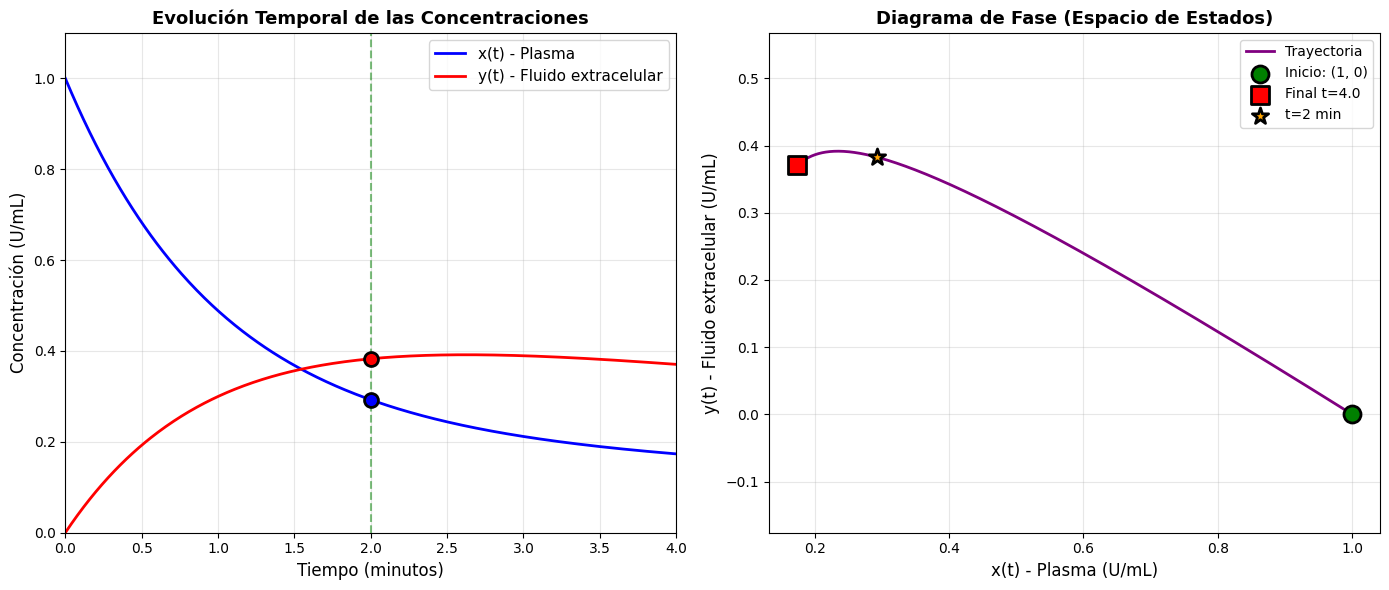


Gráficas generadas:
  1. Evolución temporal: x(t) e y(t) vs tiempo
  2. Diagrama de fase: trayectoria en el plano (x, y)


In [47]:
plt.figure(figsize=(14, 6))

# Subplot 1: Concentraciones vs tiempo
plt.subplot(1, 2, 1)
plt.plot(t_sol, x_sol, 'b-', linewidth=2, label='x(t) - Plasma')
plt.plot(t_sol, y_sol, 'r-', linewidth=2, label='y(t) - Fluido extracelular')
plt.xlabel('Tiempo (minutos)', fontsize=12)
plt.ylabel('Concentración (U/mL)', fontsize=12)
plt.title('Evolución Temporal de las Concentraciones', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim([0, 4])
plt.ylim([0, 1.1])

# Marcar t=2 minutos
t_2 = 2.0
idx_2 = int((t_2 - t0) / h)
plt.axvline(x=t_2, color='green', linestyle='--', alpha=0.5, linewidth=1.5)
plt.scatter([t_2], [x_sol[idx_2]], color='blue', s=100, zorder=5, edgecolors='black', linewidth=2)
plt.scatter([t_2], [y_sol[idx_2]], color='red', s=100, zorder=5, edgecolors='black', linewidth=2)

# Subplot 2: Diagrama de fase
plt.subplot(1, 2, 2)
plt.plot(x_sol, y_sol, 'purple', linewidth=2, label='Trayectoria')
plt.scatter([x0], [y0], color='green', s=150, marker='o', 
           edgecolors='black', linewidth=2, zorder=5, label='Inicio: (1, 0)')
plt.scatter([x_sol[-1]], [y_sol[-1]], color='red', s=150, marker='s', 
           edgecolors='black', linewidth=2, zorder=5, label=f'Final t={tf}')
plt.scatter([x_sol[idx_2]], [y_sol[idx_2]], color='orange', s=150, marker='*', 
           edgecolors='black', linewidth=2, zorder=5, label=f't=2 min')
plt.xlabel('x(t) - Plasma (U/mL)', fontsize=12)
plt.ylabel('y(t) - Fluido extracelular (U/mL)', fontsize=12)
plt.title('Diagrama de Fase (Espacio de Estados)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.axis('equal')

plt.tight_layout()
plt.show()

print("\nGráficas generadas:")
print("  1. Evolución temporal: x(t) e y(t) vs tiempo")
print("  2. Diagrama de fase: trayectoria en el plano (x, y)")

### Concentración en el Fluido Extracelular en t = 2 minutos


In [48]:
# Encontrar el índice correspondiente a t = 2 minutos
t_objetivo = 2.0
idx = int((t_objetivo - t0) / h)
t_real = t_sol[idx]
y_en_t2 = y_sol[idx]

print("\n" + "="*70)
print("CONCENTRACIÓN EN FLUIDO EXTRACELULAR EN t = 2 MINUTOS")
print("="*70)

print(f"\nTiempo objetivo: t = {t_objetivo} minutos")
print(f"Índice en el array: {idx}")
print(f"Tiempo real: t = {t_real:.4f} minutos")
print(f"\n{'='*70}")
print(f"  y({t_objetivo}) = {y_en_t2:.8f} U/mL")
print(f"{'='*70}")
print(f"\nRedondeado: y(2) ≈ {y_en_t2:.4f} U/mL")


CONCENTRACIÓN EN FLUIDO EXTRACELULAR EN t = 2 MINUTOS

Tiempo objetivo: t = 2.0 minutos
Índice en el array: 200
Tiempo real: t = 2.0000 minutos

  y(2.0) = 0.38277210 U/mL

Redondeado: y(2) ≈ 0.3828 U/mL


### c) Concentración en el Plasma en t = 2 minutos

In [49]:
x_en_t2 = x_sol[idx]

print("\n" + "="*70)
print("CONCENTRACIÓN EN PLASMA SANGUÍNEO EN t = 2 MINUTOS")
print("="*70)

print(f"\nTiempo: t = {t_objetivo} minutos")
print(f"\n{'='*70}")
print(f"  x({t_objetivo}) = {x_en_t2:.8f} U/mL")
print(f"{'='*70}")
print(f"\nRedondeado: x(2) ≈ {x_en_t2:.4f} U/mL")

# Resumen en t=2
print("\n" + "="*70)
print(f"RESUMEN DE CONCENTRACIONES EN t = {t_objetivo} minutos")
print("="*70)
print(f"\n  Plasma sanguíneo:      x(2) = {x_en_t2:.6f} U/mL")
print(f"  Fluido extracelular:   y(2) = {y_en_t2:.6f} U/mL")
print(f"  Concentración total:   x+y  = {x_en_t2 + y_en_t2:.6f} U/mL")


CONCENTRACIÓN EN PLASMA SANGUÍNEO EN t = 2 MINUTOS

Tiempo: t = 2.0 minutos

  x(2.0) = 0.29255344 U/mL

Redondeado: x(2) ≈ 0.2926 U/mL

RESUMEN DE CONCENTRACIONES EN t = 2.0 minutos

  Plasma sanguíneo:      x(2) = 0.292553 U/mL
  Fluido extracelular:   y(2) = 0.382772 U/mL
  Concentración total:   x+y  = 0.675326 U/mL


### d) Interpretación Física del Comportamiento

In [50]:
print("\n" + "="*70)
print("ANÁLISIS DEL COMPORTAMIENTO TEMPORAL")
print("="*70)

# Valores en puntos clave
tiempos_clave = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
print("\nTabla de evolución:")
print("\n  t (min)  |  x(t) Plasma  |  y(t) Extracel  |  Total (x+y)  |  Pérdida")
print("-" * 75)

for t_k in tiempos_clave:
    idx_k = int((t_k - t0) / h)
    x_k = x_sol[idx_k]
    y_k = y_sol[idx_k]
    total = x_k + y_k
    perdida = (1.0 - total) * 100
    print(f"  {t_k:6.2f}   |   {x_k:10.6f}   |   {y_k:11.6f}   |   {total:9.6f}   |  {perdida:5.2f}%")

# Encontrar el máximo de y(t)
idx_max_y = np.argmax(y_sol)
t_max_y = t_sol[idx_max_y]
y_max = y_sol[idx_max_y]

print(f"\nPico de concentración en fluido extracelular:")
print(f"  y_max = {y_max:.6f} U/mL en t = {t_max_y:.4f} minutos")

# Punto de cruce (donde x = y)
diferencia = np.abs(x_sol - y_sol)
idx_cruce = np.argmin(diferencia)
t_cruce = t_sol[idx_cruce]
x_cruce = x_sol[idx_cruce]
y_cruce = y_sol[idx_cruce]

print(f"\nPunto de equilibrio entre compartimientos (x ≈ y):")
print(f"  t ≈ {t_cruce:.4f} minutos")
print(f"  x({t_cruce:.2f}) ≈ {x_cruce:.6f} U/mL")
print(f"  y({t_cruce:.2f}) ≈ {y_cruce:.6f} U/mL")
print(f"  Diferencia: {abs(x_cruce - y_cruce):.6f} U/mL")


ANÁLISIS DEL COMPORTAMIENTO TEMPORAL

Tabla de evolución:

  t (min)  |  x(t) Plasma  |  y(t) Extracel  |  Total (x+y)  |  Pérdida
---------------------------------------------------------------------------
    0.00   |     1.000000   |      0.000000   |    1.000000   |   0.00%
    0.50   |     0.682849   |      0.192409   |    0.875258   |  12.47%
    1.00   |     0.488495   |      0.299794   |    0.788289   |  21.17%
    1.50   |     0.368178   |      0.356388   |    0.724566   |  27.54%
    2.00   |     0.292553   |      0.382772   |    0.675326   |  32.47%
    2.50   |     0.243959   |      0.391314   |    0.635273   |  36.47%
    3.00   |     0.211763   |      0.389441   |    0.601203   |  39.88%
    3.50   |     0.189561   |      0.381606   |    0.571167   |  42.88%
    4.00   |     0.173496   |      0.370477   |    0.543973   |  45.60%

Pico de concentración en fluido extracelular:
  y_max = 0.391609 U/mL en t = 2.6300 minutos

Punto de equilibrio entre compartimientos (x ≈ y):

### Interpretación Física Detallada

In [51]:
print("\n" + "="*70)
print("INTERPRETACIÓN FÍSICA")
print("="*70)

print("\n🔬 FASE 1: DISTRIBUCIÓN INICIAL (t = 0 - 1 min)")
print("-" * 70)
print("• La insulina se inyecta directamente en el plasma (x(0) = 1 U/mL)")
print("• El fluido extracelular está inicialmente vacío (y(0) = 0 U/mL)")
print("• Comienza inmediatamente:")
print("  - Transferencia del plasma al fluido extracelular (0.5x)")
print("  - Eliminación desde el plasma (-0.8x)")
print("• El plasma PIERDE insulina rápidamente")
print("• El fluido extracelular GANA insulina")

# Tasas iniciales
print(f"\nTasas iniciales en t=0:")
print(f"  • Plasma pierde: {abs(dx_dt_0):.2f} U/mL/min")
print(f"  • Fluido gana: {dy_dt_0:.2f} U/mL/min")
print(f"  • Pérdida neta del sistema: {abs(dx_dt_0) - dy_dt_0:.2f} U/mL/min")

print("\n🔄 FASE 2: EQUILIBRACIÓN (t ≈ 1 - 2.5 min)")
print("-" * 70)
print(f"• En t ≈ {t_cruce:.2f} min, las concentraciones se igualan:")
print(f"  x ≈ y ≈ {x_cruce:.4f} U/mL")
print("• El fluido extracelular alcanza su concentración máxima")
print(f"  y_max = {y_max:.4f} U/mL en t = {t_max_y:.2f} min")
print("• Después del cruce, y(t) > x(t)")
print("• El fluido extracelular ahora retorna insulina al plasma")

print("\n⚖️ FASE 3: ESTADO CUASI-ESTACIONARIO (t > 2.5 min)")
print("-" * 70)
print("• Ambas concentraciones decaen lentamente")
print("• Se mantiene y(t) > x(t)")
print("• El sistema tiende hacia el equilibrio final (x→0, y→0)")
print("• La pérdida total continúa debido a la eliminación desde el plasma")

# Calcular tasas de cambio al final
dx_dt_final, dy_dt_final = sistema_insulina(tf, x_sol[-1], y_sol[-1])
print(f"\nTasas finales en t={tf} min:")
print(f"  • x'({tf}) = {dx_dt_final:.6f} U/mL/min")
print(f"  • y'({tf}) = {dy_dt_final:.6f} U/mL/min")
print(f"  • Ambas negativas: el sistema continúa perdiendo insulina")

print("\n💉 BALANCE DE MASA")
print("-" * 70)
print("• Cantidad inicial de insulina: 1.0 U/mL (solo en plasma)")
print(f"• Cantidad en t=2 min: {x_en_t2 + y_en_t2:.6f} U/mL")
print(f"• Pérdida hasta t=2: {1.0 - (x_en_t2 + y_en_t2):.6f} U/mL ({(1.0 - (x_en_t2 + y_en_t2))*100:.2f}%)")
print(f"• Cantidad en t={tf} min: {x_sol[-1] + y_sol[-1]:.6f} U/mL")
print(f"• Pérdida hasta t={tf}: {1.0 - (x_sol[-1] + y_sol[-1]):.6f} U/mL ({(1.0 - (x_sol[-1] + y_sol[-1]))*100:.2f}%)")

print("\n⏱️ DINÁMICA DEL SISTEMA")
print("-" * 70)
print("• El sistema NO alcanza equilibrio estacionario verdadero")
print("• En cambio, todas las concentraciones tienden a CERO")
print("• Esto se debe a la tasa de eliminación (-0.8x) en el plasma")
print("• El fluido extracelular actúa como un 'reservorio temporal'")
print("• La insulina eventualmente es eliminada completamente del sistema")


INTERPRETACIÓN FÍSICA

🔬 FASE 1: DISTRIBUCIÓN INICIAL (t = 0 - 1 min)
----------------------------------------------------------------------
• La insulina se inyecta directamente en el plasma (x(0) = 1 U/mL)
• El fluido extracelular está inicialmente vacío (y(0) = 0 U/mL)
• Comienza inmediatamente:
  - Transferencia del plasma al fluido extracelular (0.5x)
  - Eliminación desde el plasma (-0.8x)
• El plasma PIERDE insulina rápidamente
• El fluido extracelular GANA insulina

Tasas iniciales en t=0:
  • Plasma pierde: 0.80 U/mL/min
  • Fluido gana: 0.50 U/mL/min
  • Pérdida neta del sistema: 0.30 U/mL/min

🔄 FASE 2: EQUILIBRACIÓN (t ≈ 1 - 2.5 min)
----------------------------------------------------------------------
• En t ≈ 1.55 min, las concentraciones se igualan:
  x ≈ y ≈ 0.3590 U/mL
• El fluido extracelular alcanza su concentración máxima
  y_max = 0.3916 U/mL en t = 2.63 min
• Después del cruce, y(t) > x(t)
• El fluido extracelular ahora retorna insulina al plasma

⚖️ FASE 3: EST

**Gráficas Adicionales para Interpretación**

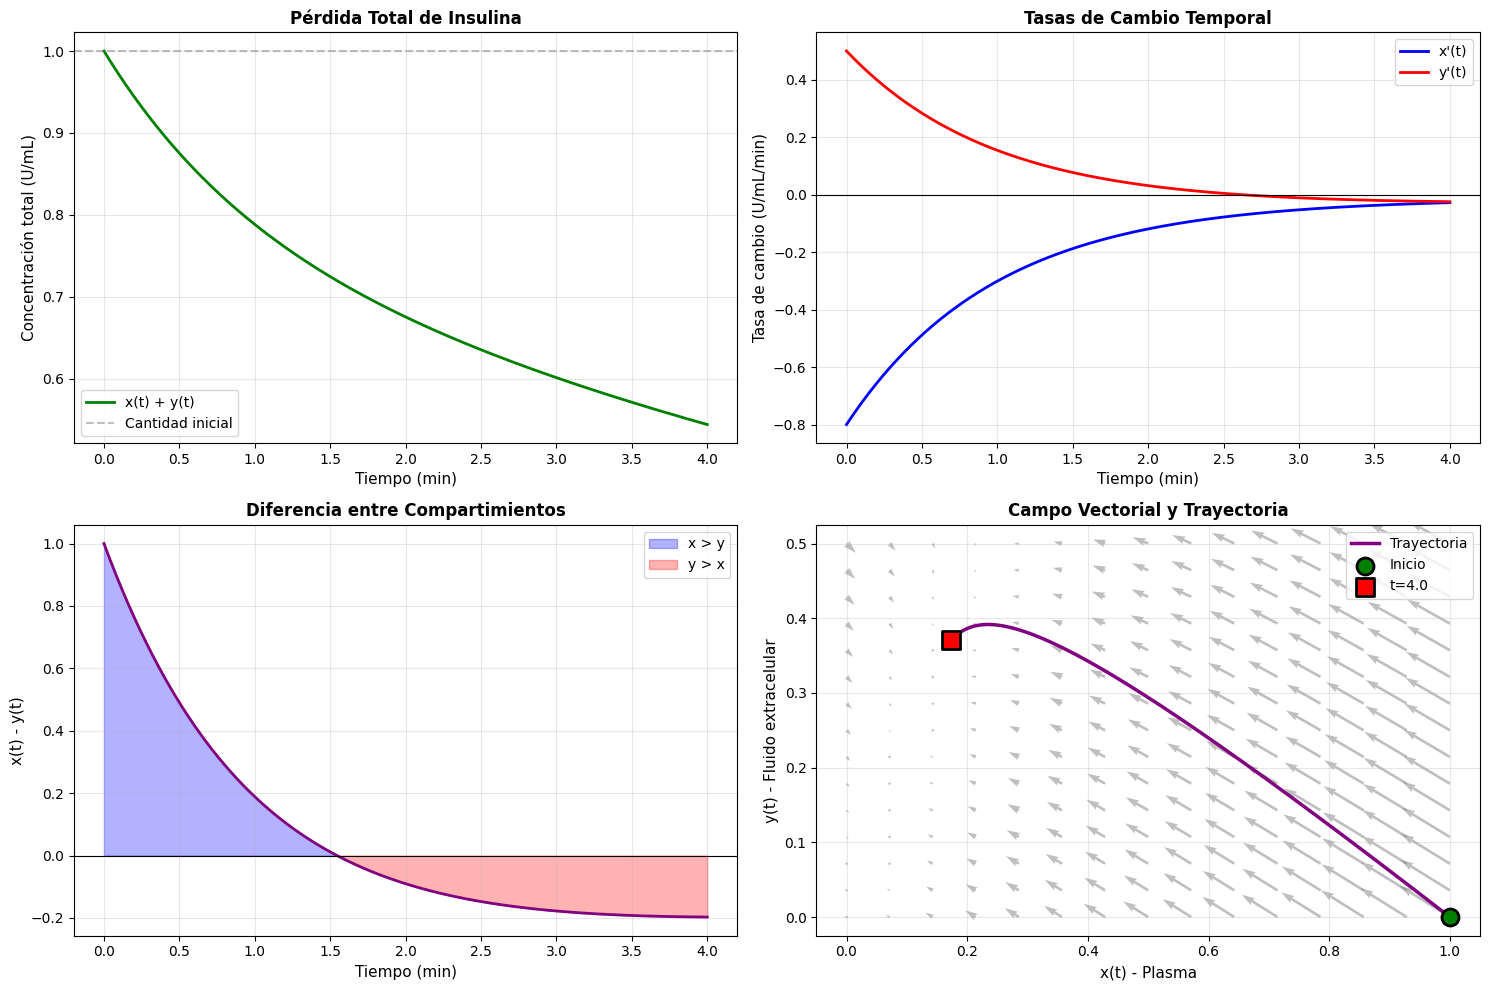

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Concentración total
ax1 = axes[0, 0]
total = x_sol + y_sol
ax1.plot(t_sol, total, 'g-', linewidth=2, label='x(t) + y(t)')
ax1.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Cantidad inicial')
ax1.set_xlabel('Tiempo (min)', fontsize=11)
ax1.set_ylabel('Concentración total (U/mL)', fontsize=11)
ax1.set_title('Pérdida Total de Insulina', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Subplot 2: Tasas de cambio
ax2 = axes[0, 1]
dx_dt_array = np.array([sistema_insulina(t, x, y)[0] for t, x, y in zip(t_sol, x_sol, y_sol)])
dy_dt_array = np.array([sistema_insulina(t, x, y)[1] for t, x, y in zip(t_sol, x_sol, y_sol)])
ax2.plot(t_sol, dx_dt_array, 'b-', linewidth=2, label="x'(t)")
ax2.plot(t_sol, dy_dt_array, 'r-', linewidth=2, label="y'(t)")
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_xlabel('Tiempo (min)', fontsize=11)
ax2.set_ylabel('Tasa de cambio (U/mL/min)', fontsize=11)
ax2.set_title('Tasas de Cambio Temporal', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Subplot 3: Diferencia x - y
ax3 = axes[1, 0]
diferencia = x_sol - y_sol
ax3.plot(t_sol, diferencia, 'purple', linewidth=2)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax3.fill_between(t_sol, 0, diferencia, where=(diferencia > 0), alpha=0.3, color='blue', label='x > y')
ax3.fill_between(t_sol, 0, diferencia, where=(diferencia < 0), alpha=0.3, color='red', label='y > x')
ax3.set_xlabel('Tiempo (min)', fontsize=11)
ax3.set_ylabel('x(t) - y(t)', fontsize=11)
ax3.set_title('Diferencia entre Compartimientos', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Subplot 4: Campo vectorial (diagrama de fase con flechas)
ax4 = axes[1, 1]
x_range = np.linspace(0, 1, 15)
y_range = np.linspace(0, 0.5, 15)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
U = -0.8 * X_grid + 0.3 * Y_grid
V = 0.5 * X_grid - 0.3 * Y_grid
ax4.quiver(X_grid, Y_grid, U, V, alpha=0.5, color='gray')
ax4.plot(x_sol, y_sol, 'purple', linewidth=2.5, label='Trayectoria')
ax4.scatter([x0], [y0], color='green', s=150, marker='o', 
           edgecolors='black', linewidth=2, zorder=5, label='Inicio')
ax4.scatter([x_sol[-1]], [y_sol[-1]], color='red', s=150, marker='s', 
           edgecolors='black', linewidth=2, zorder=5, label=f't={tf}')
ax4.set_xlabel('x(t) - Plasma', fontsize=11)
ax4.set_ylabel('y(t) - Fluido extracelular', fontsize=11)
ax4.set_title('Campo Vectorial y Trayectoria', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()